In [1]:
import numpy as np
import os
from utils.input_data import read_data_sets
import utils.datasets as ds
import utils.augmentation as aug
import utils.helper as hlp
import matplotlib.pyplot as plt

In [2]:
dataset = "CBF"

nb_class = ds.nb_classes(dataset)
nb_dims = ds.nb_dims(dataset)

In [4]:
# Load Data
train_data_file = os.path.join("data", dataset, "%s_TRAIN.tsv"%dataset)
test_data_file = os.path.join("data", dataset, "%s_TEST.tsv"%dataset)

x_train, y_train, x_test, y_test = read_data_sets(train_data_file, "", test_data_file, "", delimiter="\t")

y_train = ds.class_offset(y_train, dataset)
y_test= ds.class_offset(y_test, dataset)
nb_timesteps = int(x_train.shape[1] / nb_dims)
input_shape = (nb_timesteps , nb_dims)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = 2. * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.
# Test is secret
x_test = 2. * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.

x_test = x_test.reshape((-1, input_shape[0], input_shape[1])) 
x_train = x_train.reshape((-1, input_shape[0], input_shape[1])) 

## Original

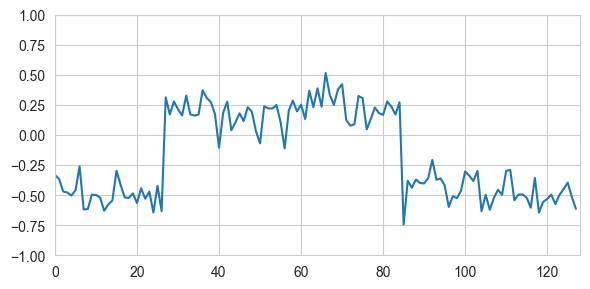

In [5]:
hlp.plot1d(x_train[0])

## Jittering

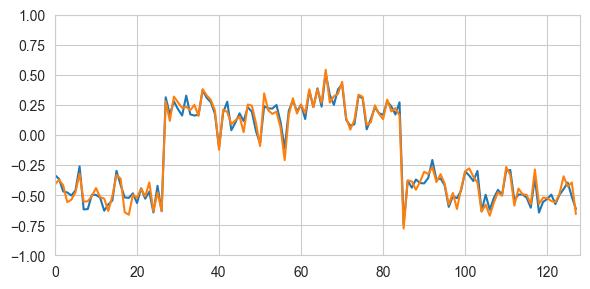

In [9]:
hlp.plot1d(x_train[0], aug.jitter(x_train, sigma=0.05)[0])

In [6]:
## Scaling

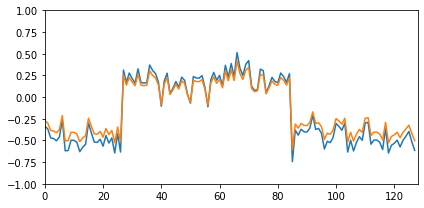

In [7]:
hlp.plot1d(x_train[0], aug.scaling(x_train)[0])

In [8]:
## Permutation

/Users/forna/Documents/1.Politecnico/AN2DL/challenges/AN2DL-Challenges/Homework2/Models/ModelsRaf/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


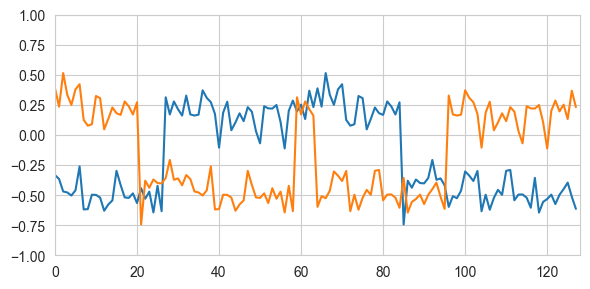

In [10]:
hlp.plot1d(x_train[0], aug.permutation(x_train)[0])

In [11]:
## Magnitude Warping

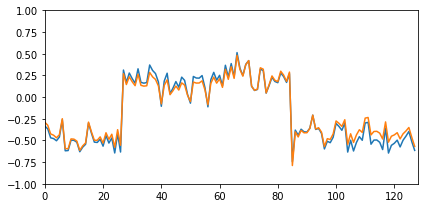

In [11]:
hlp.plot1d(x_train[0], aug.magnitude_warp(x_train)[0])

In [12]:
## Time Warping

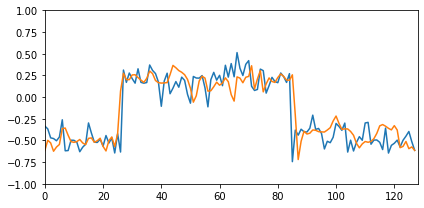

In [13]:
hlp.plot1d(x_train[0], aug.time_warp(x_train)[0])

In [14]:
## Rotation

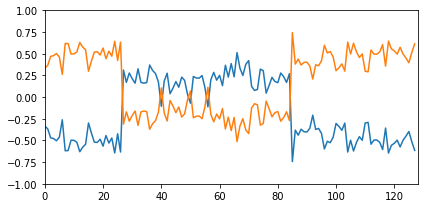

In [15]:
hlp.plot1d(x_train[0], aug.rotation(x_train)[0])

In [16]:
## Window Slicing

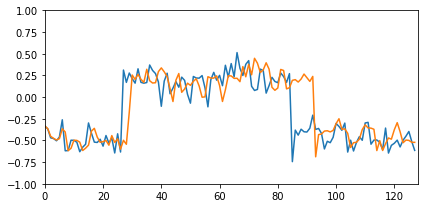

In [17]:
hlp.plot1d(x_train[0], aug.window_slice(x_train)[0])

In [18]:
## Window Warping

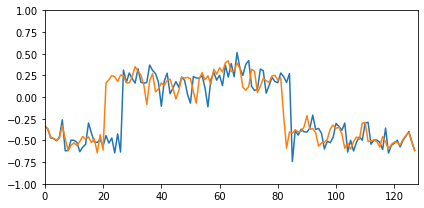

In [19]:
hlp.plot1d(x_train[0], aug.window_warp(x_train)[0])

In [20]:
## Suboptimal Warping Time Series Generator (SPAWNER)

100%|██████████| 30/30 [00:00<00:00, 67.57it/s]


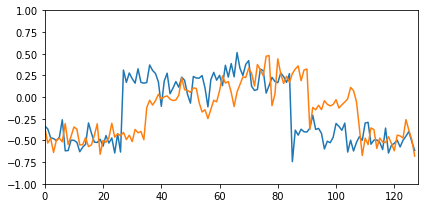

In [21]:
hlp.plot1d(x_train[0], aug.spawner(x_train, y_train)[0])

In [22]:
## Weighted Dynamic Time Series Barycenter Averaging (wDBA)

100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


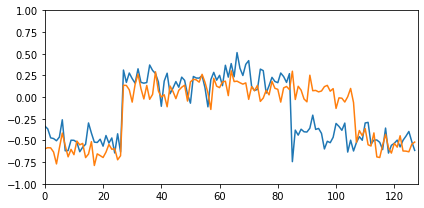

In [23]:
hlp.plot1d(x_train[0], aug.wdba(x_train, y_train)[0])

In [24]:
## Random Guided Warping

100%|██████████| 30/30 [00:00<00:00, 66.69it/s]


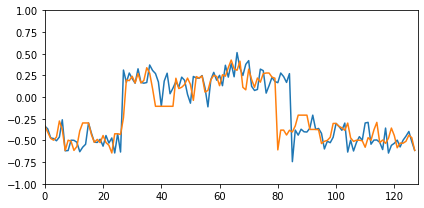

In [25]:
hlp.plot1d(x_train[0], aug.random_guided_warp(x_train, y_train)[0])

In [26]:
## Discriminative Guided Warping

100%|██████████| 30/30 [00:05<00:00,  5.48it/s]


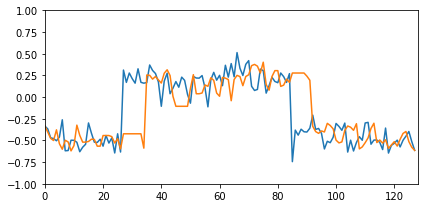

In [27]:
hlp.plot1d(x_train[0], aug.discriminative_guided_warp(x_train, y_train)[0])